<a href="https://colab.research.google.com/github/Salonee27/Eye-Disease-Detection/blob/main/Eye_Disease_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly


  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/0b/f8/b65cdd2be32e442c4efe7b672f73c90b05eab5a7f3f4115efe181d432c60/plotly-5.22.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/61/a1/6bb0cbebefb23641f068bb58a2bc56da9beb2b1c550242e3c540b37698f3/tenacity-8.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB 640.0 kB/s eta 0:00:26
   ---------------------------------------- 0.1/16.4 MB 919.0 kB/s eta 0:00:18
   - -------------------------------------- 0.8/16.4 MB 6.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/16.4 MB 11.7 MB/s eta 0:00:02
   ------ --------------------------------- 2.8/16.4 MB 12.5 MB/s eta 0:00:02
   -------- ------------------------------- 3.5/16.4 MB 13.3 MB/s eta 0:00:01
   --------- ------------------------------ 3.8/16.4 MB

In [ ]:
# Import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:
dir = '/content/drive/MyDrive/EYE/dataset'

In [ ]:
os.listdir(dir)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_file_path = '/content/drive/MyDrive/archive.zip'

# Directory to extract the files
extraction_dir = '/content/drive/MyDrive/EYE'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print("Folder successfully extracted to:", extraction_dir)


Folder successfully extracted to: /content/drive/MyDrive/EYE


In [ ]:
os.listdir(os.path.join(dir,'normal'))

['2394_right.jpg',
 '2395_left.jpg',
 '2395_right.jpg',
 '2396_left.jpg',
 '2396_right.jpg',
 '2397_left.jpg',
 '2397_right.jpg',
 '2399_left.jpg',
 '2399_right.jpg',
 '2400_right.jpg',
 '2403_left.jpg',
 '2403_right.jpg',
 '2408_left.jpg',
 '2408_right.jpg',
 '2410_left.jpg',
 '2410_right.jpg',
 '2415_left.jpg',
 '2415_right.jpg',
 '2418_left.jpg',
 '2418_right.jpg',
 '2419_left.jpg',
 '2419_right.jpg',
 '2421_left.jpg',
 '2421_right.jpg',
 '2422_left.jpg',
 '2422_right.jpg',
 '2423_left.jpg',
 '2423_right.jpg',
 '2426_left.jpg',
 '2426_right.jpg',
 '2427_left.jpg',
 '2427_right.jpg',
 '2428_left.jpg',
 '2432_left.jpg',
 '2432_right.jpg',
 '2435_left.jpg',
 '2435_right.jpg',
 '2437_left.jpg',
 '2437_right.jpg',
 '2438_left.jpg',
 '2438_right.jpg',
 '2441_left.jpg',
 '2441_right.jpg',
 '2443_left.jpg',
 '2443_right.jpg',
 '2444_left.jpg',
 '2444_right.jpg',
 '2446_left.jpg',
 '2446_right.jpg',
 '2448_left.jpg',
 '2456_left.jpg',
 '2456_right.jpg',
 '2463_left.jpg',
 '2463_right.jpg',
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#check the number of images
images = []
label = []

In [ ]:
# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('/content/drive/MyDrive/EYE/dataset'):
    train_class=os.listdir(os.path.join('/content/drive/MyDrive/EYE/dataset',i))
    for j in train_class:
        img = os.path.join('/content/drive/MyDrive/EYE/dataset', i, j)
        images.append(img)
        label.append(i)

print('Number of Total images = {}'.format(len(images)))

Number of Total images = 4217


<Axes: xlabel='count'>

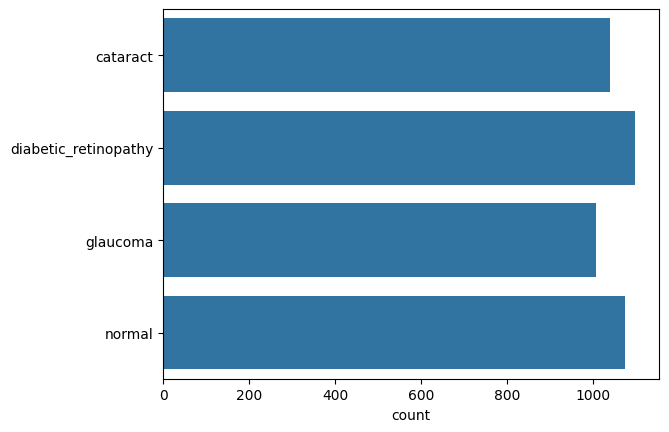

In [ ]:
sns.countplot(label) #count plot for all classes

## **Data exploration and Data visualization**

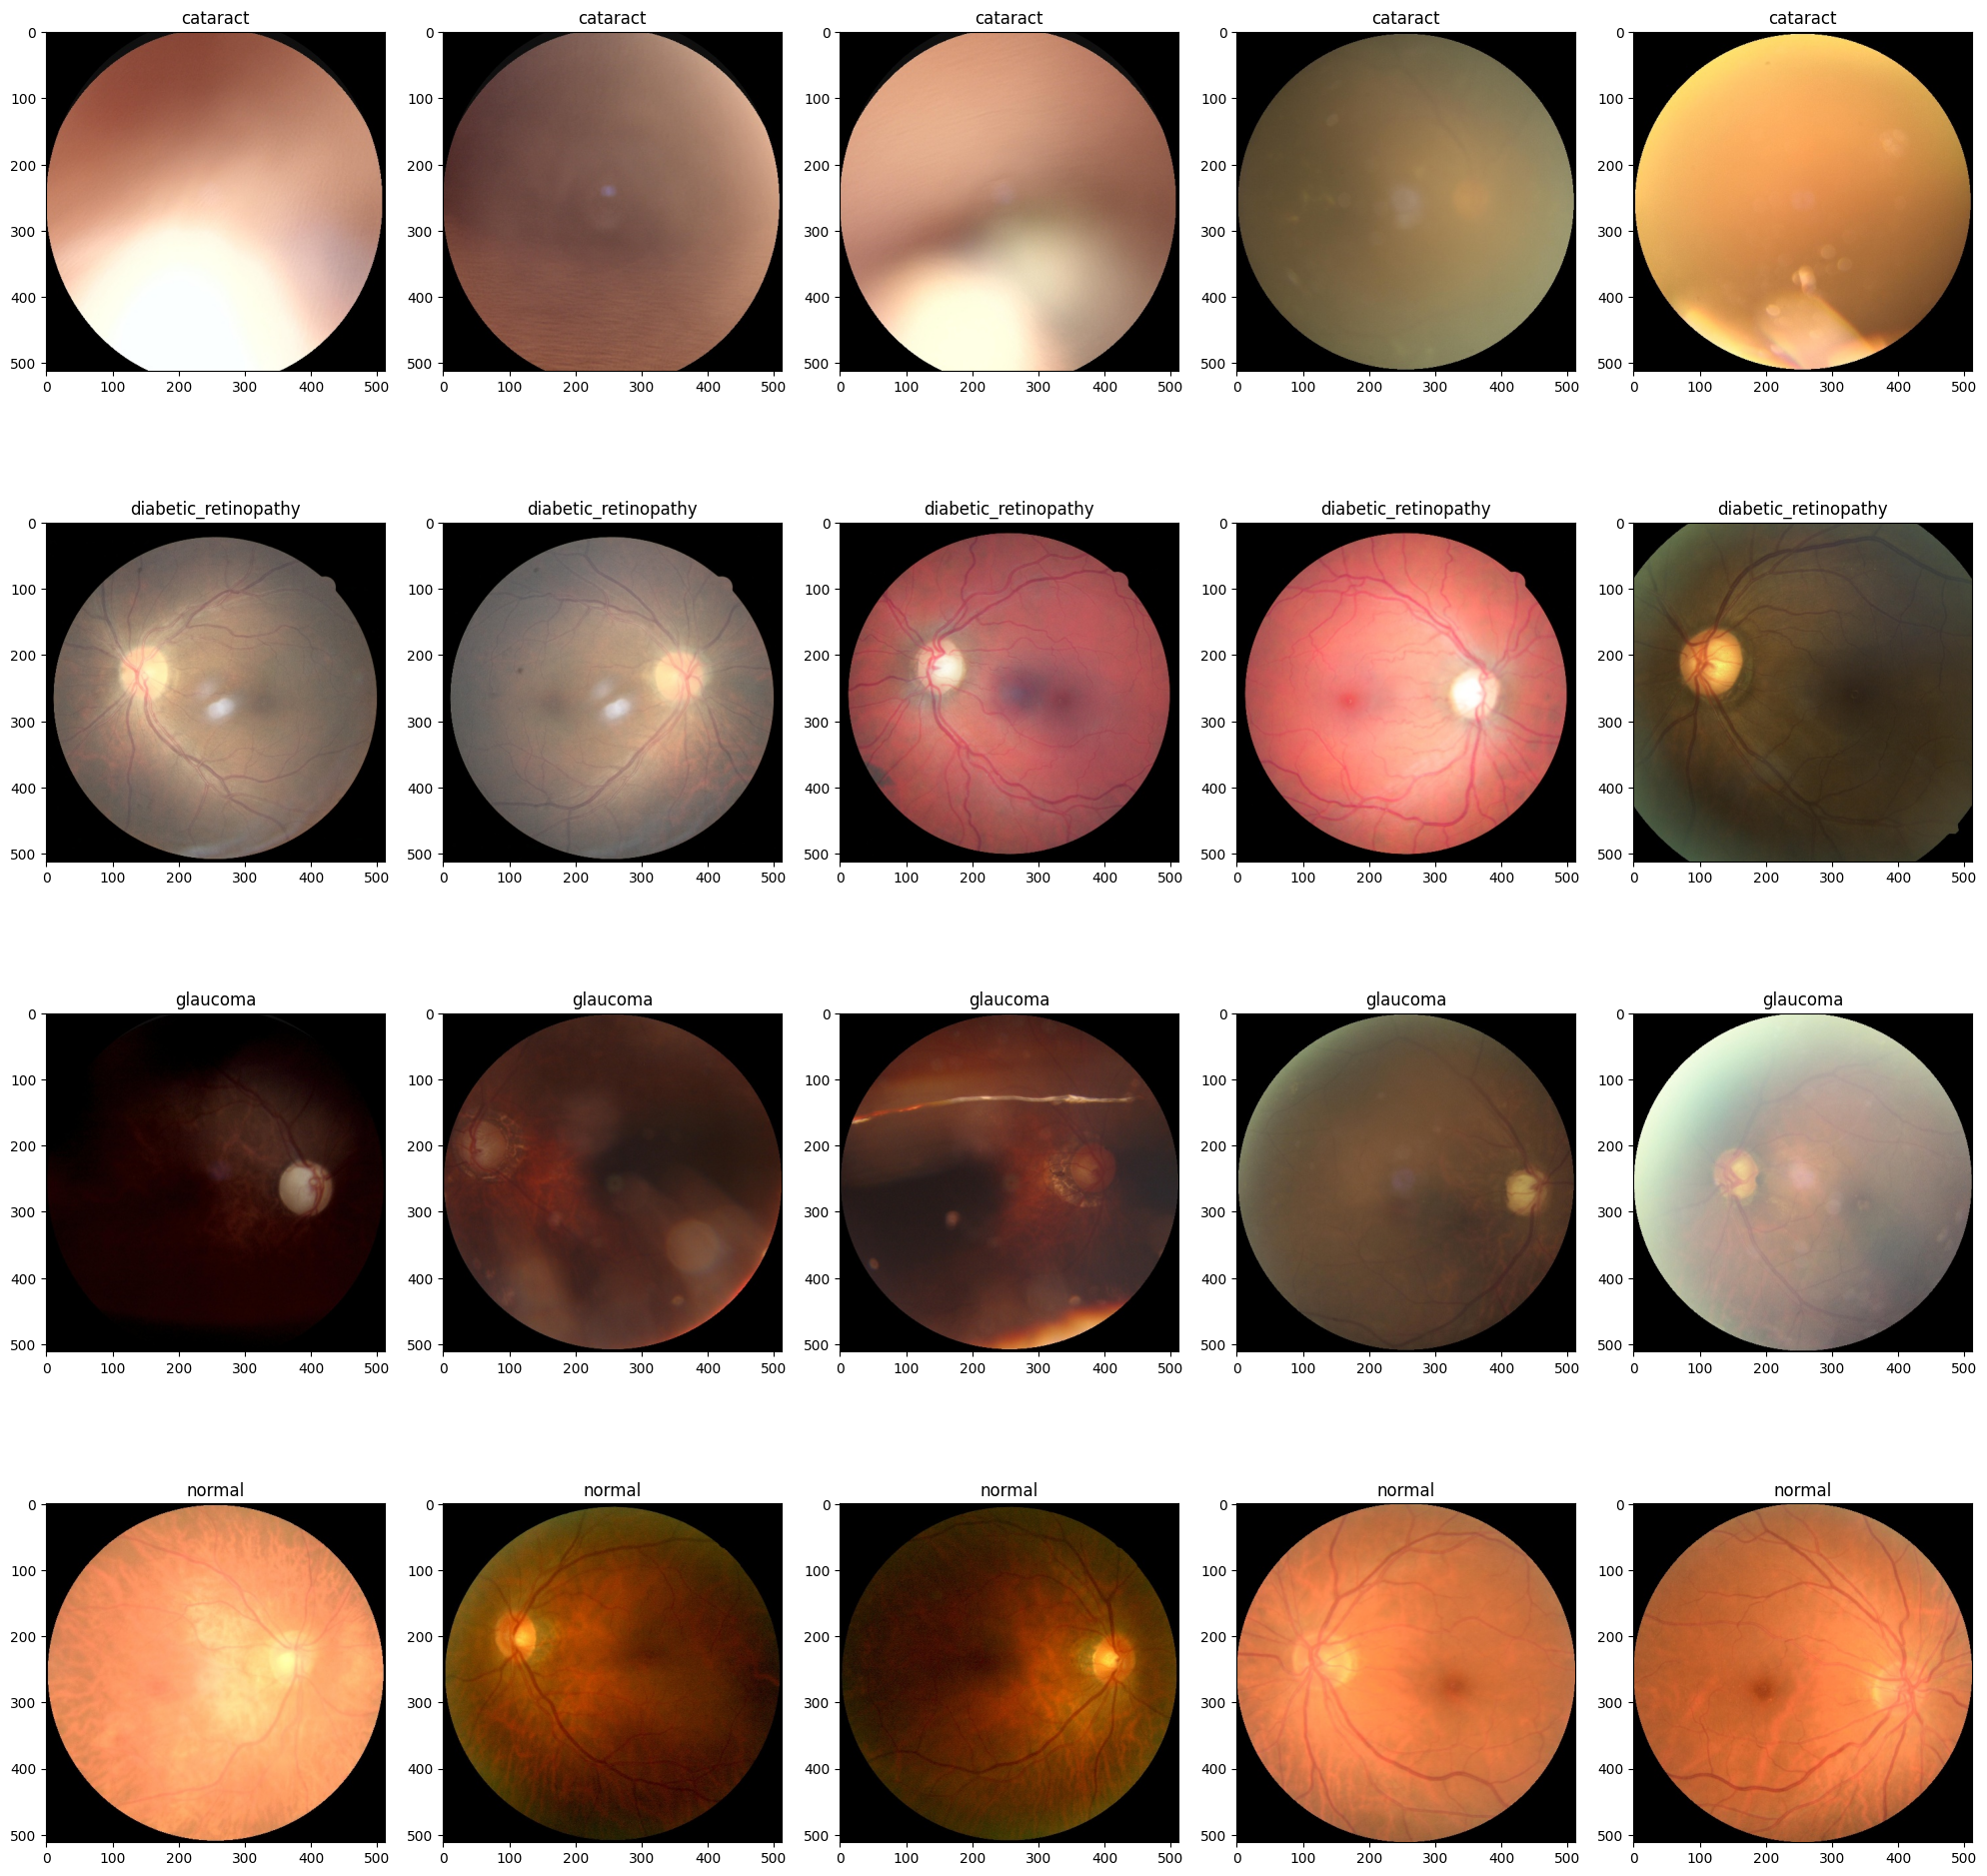

In [ ]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(4, 5, figsize = (20, 20))
count = 0
for i in os.listdir('/content/drive/MyDrive/EYE/dataset'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('/content/drive/MyDrive/EYE/dataset', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('/content/drive/MyDrive/EYE/dataset', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)
  count += 1

fig.tight_layout()

In [ ]:
# check the number of images in each class in the dataset
No_images_per_class = []
Class_name = []
for i in os.listdir('/content/drive/MyDrive/EYE'):
  train_class = os.listdir(os.path.join('/content/drive/MyDrive/EYE', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in dataset = 4 



In [ ]:
retina_df = pd.DataFrame({'Image': images,'Labels': label})
retina_df

Image    Labels
0     /content/drive/MyDrive/EYE/dataset/cataract/20...  cataract
1     /content/drive/MyDrive/EYE/dataset/cataract/20...  cataract
2     /content/drive/MyDrive/EYE/dataset/cataract/20...  cataract
3     /content/drive/MyDrive/EYE/dataset/cataract/21...  cataract
4     /content/drive/MyDrive/EYE/dataset/cataract/20...  cataract
...                                                 ...       ...
4212  /content/drive/MyDrive/EYE/dataset/normal/2389...    normal
4213  /content/drive/MyDrive/EYE/dataset/normal/2389...    normal
4214  /content/drive/MyDrive/EYE/dataset/normal/2393...    normal
4215  /content/drive/MyDrive/EYE/dataset/normal/2393...    normal
4216  /content/drive/MyDrive/EYE/dataset/normal/2394...    normal

[4217 rows x 2 columns]

In [ ]:

import matplotlib.pyplot as plt


# Get class distribution from directory structure
class_counts = {}
for class_name in os.listdir(dir):
    class_dir = os.path.join(dir, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))




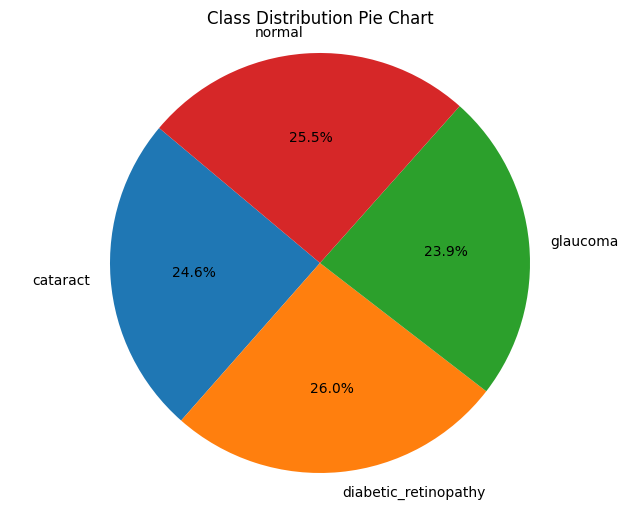

In [ ]:
#pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Class Distribution Pie Chart')
plt.show()

## **PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR**

In [ ]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train,test = train_test_split(retina_df, test_size = 0.2)

In [ ]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        vertical_flip = True,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='/content/drive/MyDrive/EYE/dataset',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=40, #32
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='/content/drive/MyDrive/EYE/dataset',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=40, #32
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='/content/drive/MyDrive/EYE/dataset',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=40)#32

Found 2868 validated image filenames belonging to 4 classes.
Found 505 validated image filenames belonging to 4 classes.
Found 844 validated image filenames belonging to 4 classes.


#  UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS (CNN) AND RESIDUAL BLOCKS

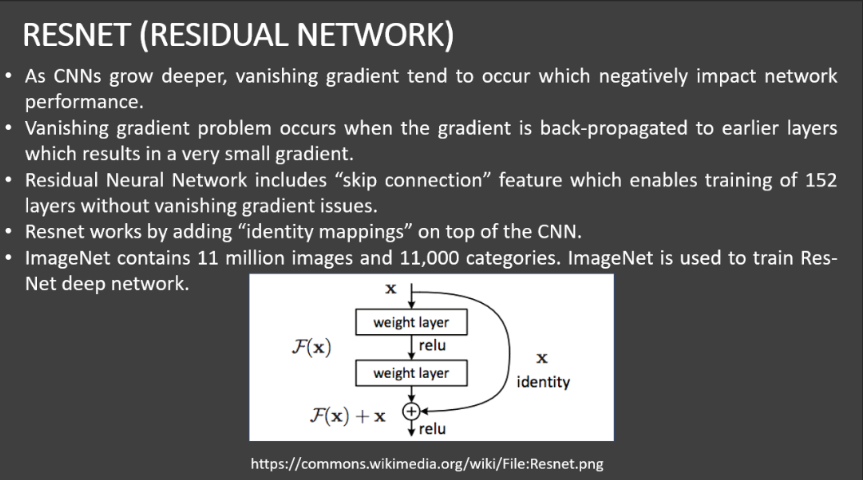

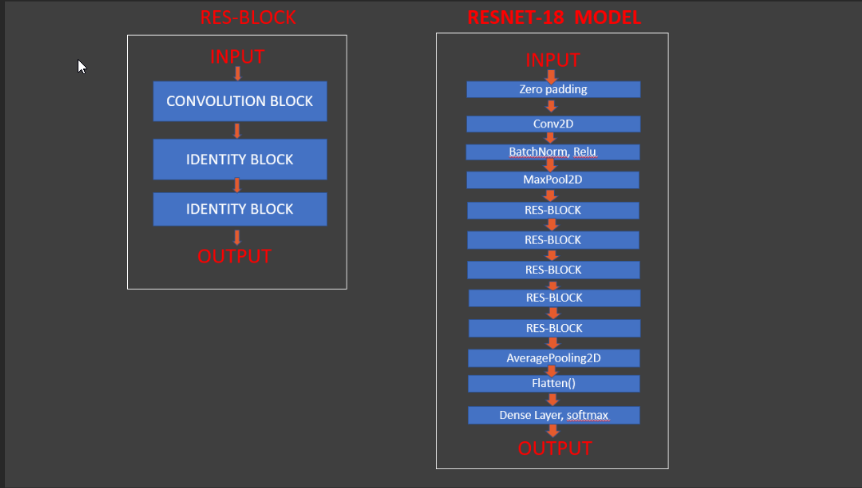

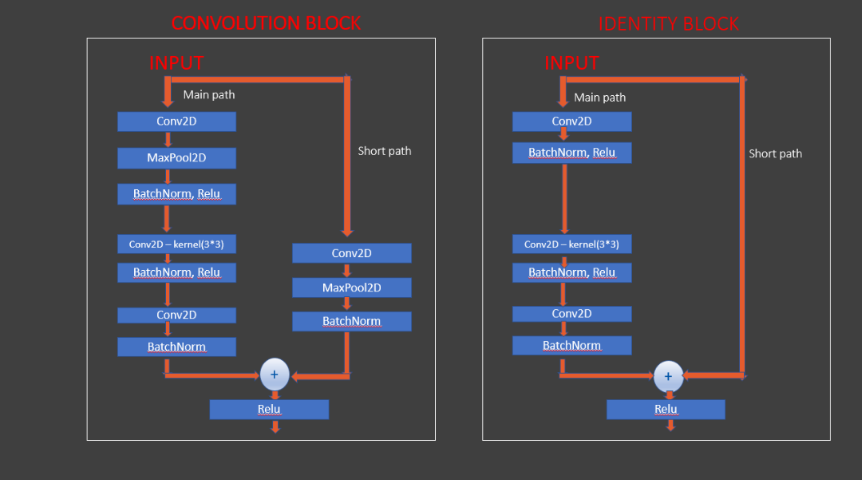

# **BUILD RES-BLOCK BASED DEEP LEARNING MODEL**

In [ ]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(32, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

# X = res_block(X, filter= [512,512,2048], stage= 5)

# Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 128, 128, 32)         4736      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['conv1[0][0]']        

In [ ]:
num_classes=4
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),
                 padding='same',
                 activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),
                padding='same',
                activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),
                padding='same',
                activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),
                padding='same',
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

#if y is hotencoded,then we use categorical crossentrophy otherwise SparseCategoricalCrossentropy
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='adam',
              metrics=['accuracy'])

# **COMPILE AND TRAIN DEEP LEARNING MODEL**

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 40, epochs = 10, validation_data= validation_generator, validation_steps= validation_generator.n // 40, callbacks=[checkpointer , earlystopping])


Epoch 1/10
71/71 [==============================] - ETA: 0s - loss: 0.3234 - accuracy: 0.8784
Epoch 1: val_loss did not improve from 0.73897
71/71 [==============================] - 430s 6s/step - loss: 0.3234 - accuracy: 0.8784 - val_loss: 1.0099 - val_accuracy: 0.6625
Epoch 2/10
71/71 [==============================] - ETA: 0s - loss: 0.2956 - accuracy: 0.8851
Epoch 2: val_loss improved from 0.73897 to 0.40662, saving model to weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



71/71 [==============================] - 410s 6s/step - loss: 0.2956 - accuracy: 0.8851 - val_loss: 0.4066 - val_accuracy: 0.8521
Epoch 3/10
71/71 [==============================] - ETA: 0s - loss: 0.3208 - accuracy: 0.8808
Epoch 3: val_loss did not improve from 0.40662
71/71 [==============================] - 371s 5s/step - loss: 0.3208 - accuracy: 0.8808 - val_loss: 0.4364 - val_accuracy: 0.8500
Epoch 4/10
71/71 [==============================] - ETA: 0s - loss: 0.2733 - accuracy: 0.8953
Epoch 4: val_loss did not improve from 0.40662
71/71 [==============================] - 395s 6s/step - loss: 0.2733 - accuracy: 0.8953 - val_loss: 0.4618 - val_accuracy: 0.8250
Epoch 5/10
71/71 [==============================] - ETA: 0s - loss: 0.2609 - accuracy: 0.8999
Epoch 5: val_loss did not improve from 0.40662
71/71 [==============================] - 423s 6s/step - loss: 0.2609 - accuracy: 0.8999 - val_loss: 0.5267 - val_accuracy: 0.7917
Epoch 6/10
71/71 [==============================] - ETA: 

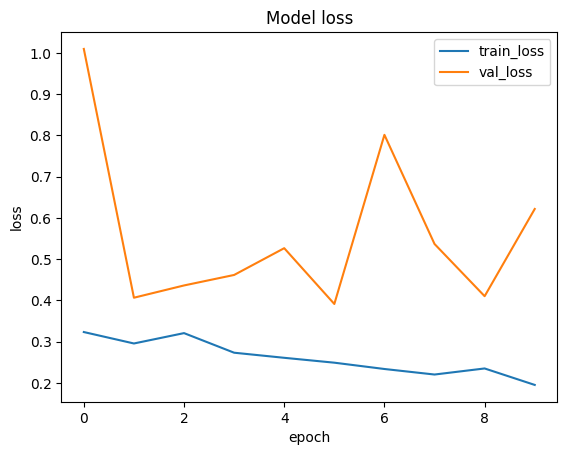

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:

model.load_weights("/content/weights.hdf5")

In [ ]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 40, verbose =1)


print('Accuracy Test : {}'.format(evaluate[1]))

21/21 [==============================] - 37s 2s/step - loss: 0.3630 - accuracy: 0.8810
Accuracy Test : 0.8809523582458496


In [ ]:
# Assigning label names to the corresponding indexes
labels = {0: 'cataract', 1: 'diabetic_retinopathy', 2: 'glaucoma', 3:'normal'}

In [ ]:
# Loading images and their predictions

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])

1/1 [==============================] - 0s 48ms/step


In [ ]:
# Getting the test accuracy
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.8791469194312796


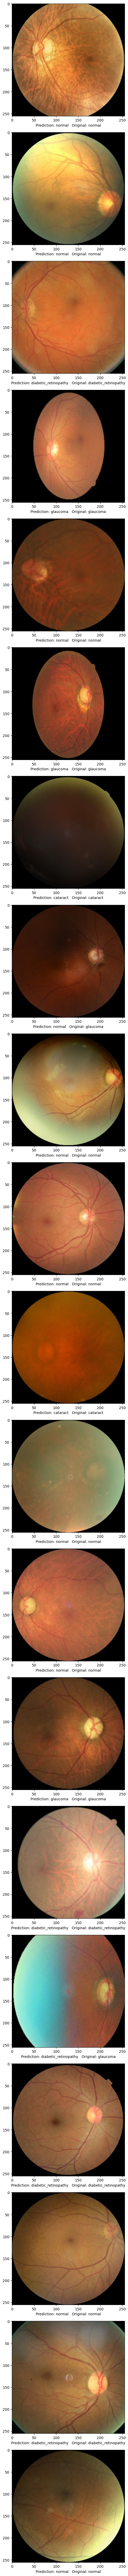

In [ ]:
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()